### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

#### Importing libraries

In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [192]:
# Importing the dataset
vehicle_data = pd.read_csv('vehicle.csv')
vehicle_data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [193]:
vehicle_data.isnull().values.any() #check for missing data. True indicates that there are missing data.

True

In [194]:
#drop the missing row as of now
vehicle_data_removedNA = vehicle_data.dropna()

In [195]:
vehicle_data_removedNA.isnull().values.any() #check for missing data. True indicates that there are missing data.

False

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [196]:
#printing the count
vehicle_data_removedNA.groupby('class').count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
car,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413
van,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195


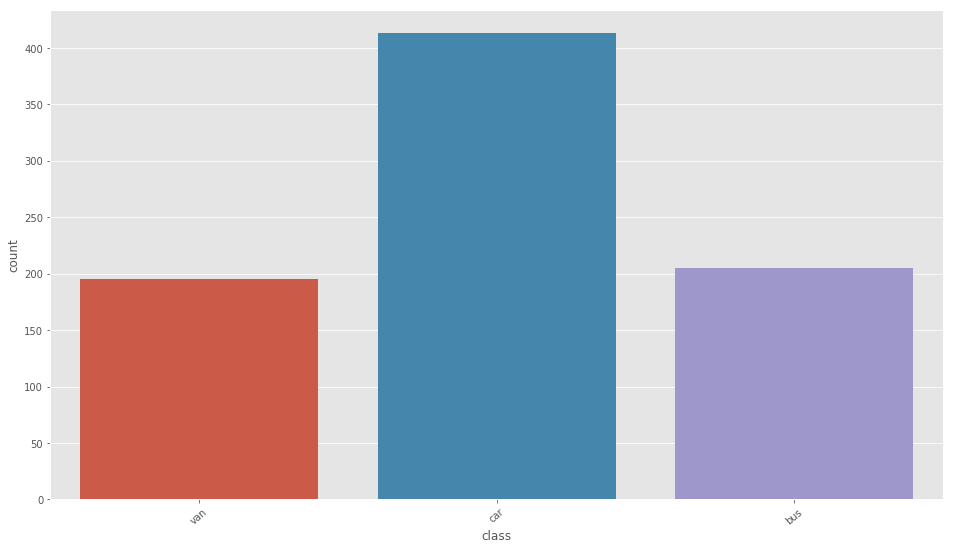

In [197]:
# different types of vehicles

plot = sns.countplot(x = "class", data = vehicle_data_removedNA)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

### Check for any missing values in the data 

In [198]:
vehicle_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [199]:
dependentVar_df = vehicle_data_removedNA.iloc[:,-1]
independentVar_df = vehicle_data_removedNA.iloc[:,0:18]

In [200]:
independentVar_df_z = independentVar_df.apply(zscore)
independentVar_df_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [201]:
#vehicle_data_removedNA_z = independentVar_df_z
#vehicle_data_removedNA_z['class'] = dependentVar_df
#vehicle_data_removedNA_z.head()

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [202]:
distortion = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [203]:
cluster_range = range( 2, 10) #no point in having 1 cluster, hence taking it from 2.
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(independentVar_df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  distortion.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(independentVar_df_z, labels, metric='euclidean'))


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": distortion , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,8623.136976,0.389788
1,3,7037.467395,0.290415
2,4,5741.186965,0.305264
3,5,5215.990806,0.232440
4,6,4717.289831,0.221005
5,7,4350.784822,0.223034
6,8,4149.435989,0.188538
7,9,3846.982451,0.208055


### 6. Plotting Elbow/ Scree Plot

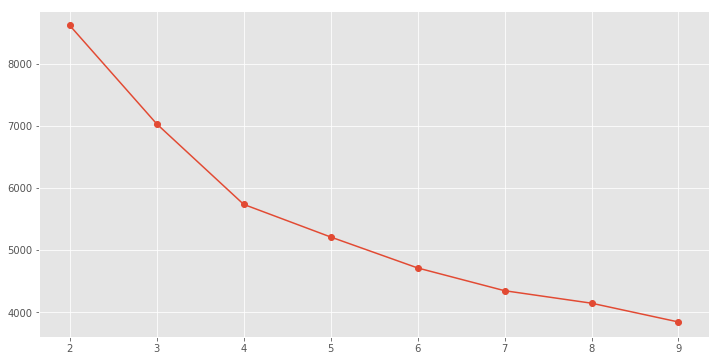

In [204]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [205]:
# The elbow plot shows that 3 or 5 might be a good choice for K and it seems logical to go with 3 given we know that there are 3 qualities of wine

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [206]:
cluster = KMeans( n_clusters = 3, random_state = 1 )
cluster.fit(independentVar_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [207]:
centroids = cluster.cluster_centers_
centroids

array([[-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299]])

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [208]:
centroid_df = pd.DataFrame(centroids, columns = list(independentVar_df_z) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [209]:
prediction=cluster.predict(independentVar_df_z)
independentVar_df_z["GROUP"] = prediction

In [210]:
independentVar_df_z.groupby("GROUP").count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
GROUP,,,,,,,,,,,,,,,,,,
0,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
1,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260
2,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313


In [211]:
cluster.labels_

array([2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1,
       2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2,
       1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0,
       2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [212]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [213]:
a_df = pd.DataFrame(a, columns=list('xy'))
b_df = pd.DataFrame(b, columns=list('xy'))
c_df = pd.DataFrame(c, columns=list('xy'))

### 9. Combine all three arrays a,b,c into a dataframe

In [214]:
dataset = pd.concat([a_df,b_df,c_df],axis=0)
dataset.head()
dataset.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA77198>,
      dtype=object)

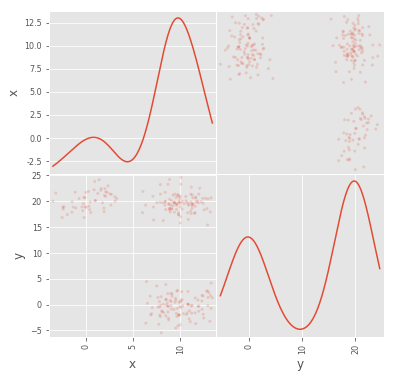

In [215]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, alpha=0.2, figsize=(6, 6), diagonal='kde')

### 11. Find out the linkage matrix

In [216]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage,fcluster
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
Z = linkage(dataset, 'ward')
c, coph_dists = cophenet(Z , pdist(dataset))

c

0.9603509410578206

Use ward as linkage metric and distance as Eucledian

### 12. Plot the dendrogram for the consolidated dataframe

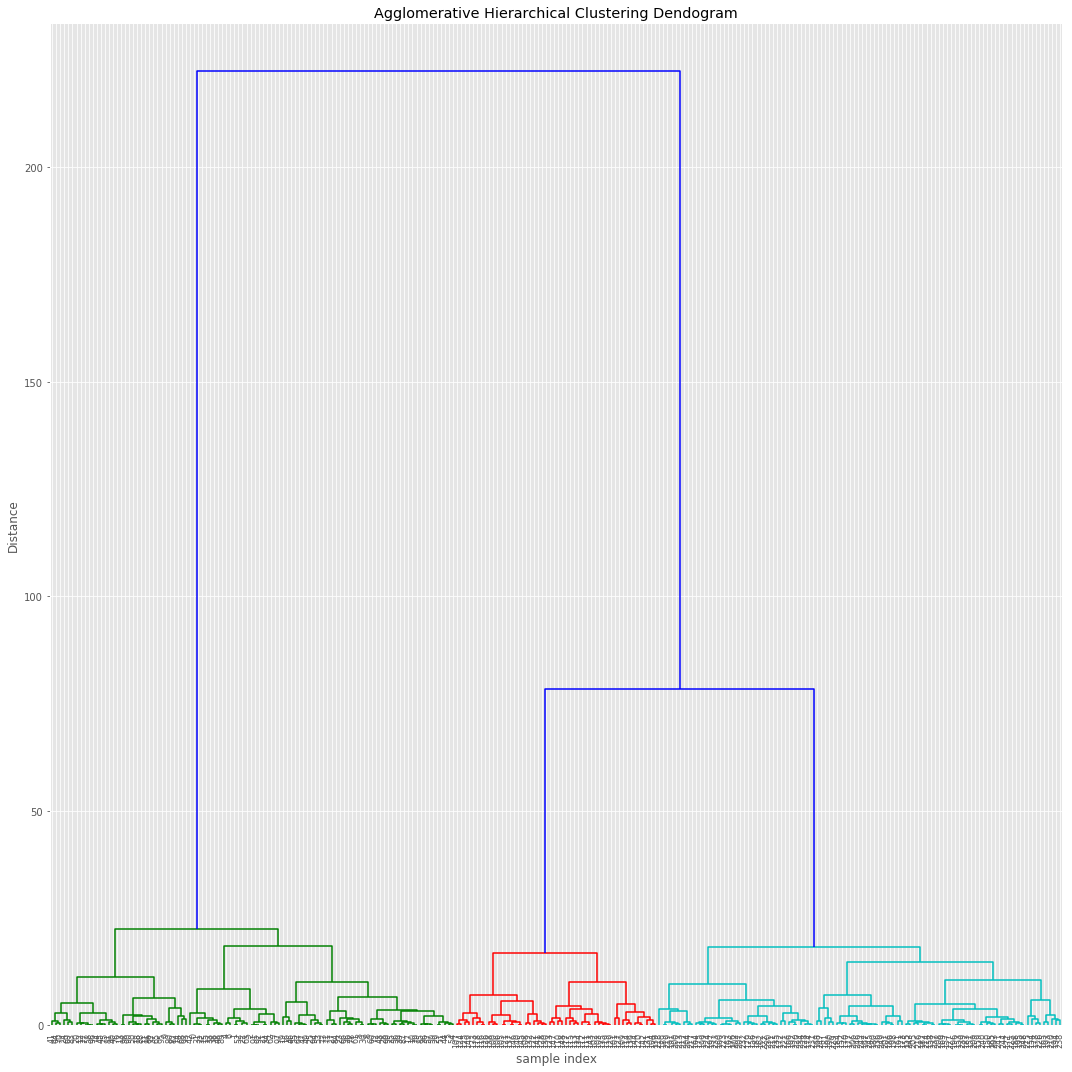

In [217]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=30,  leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

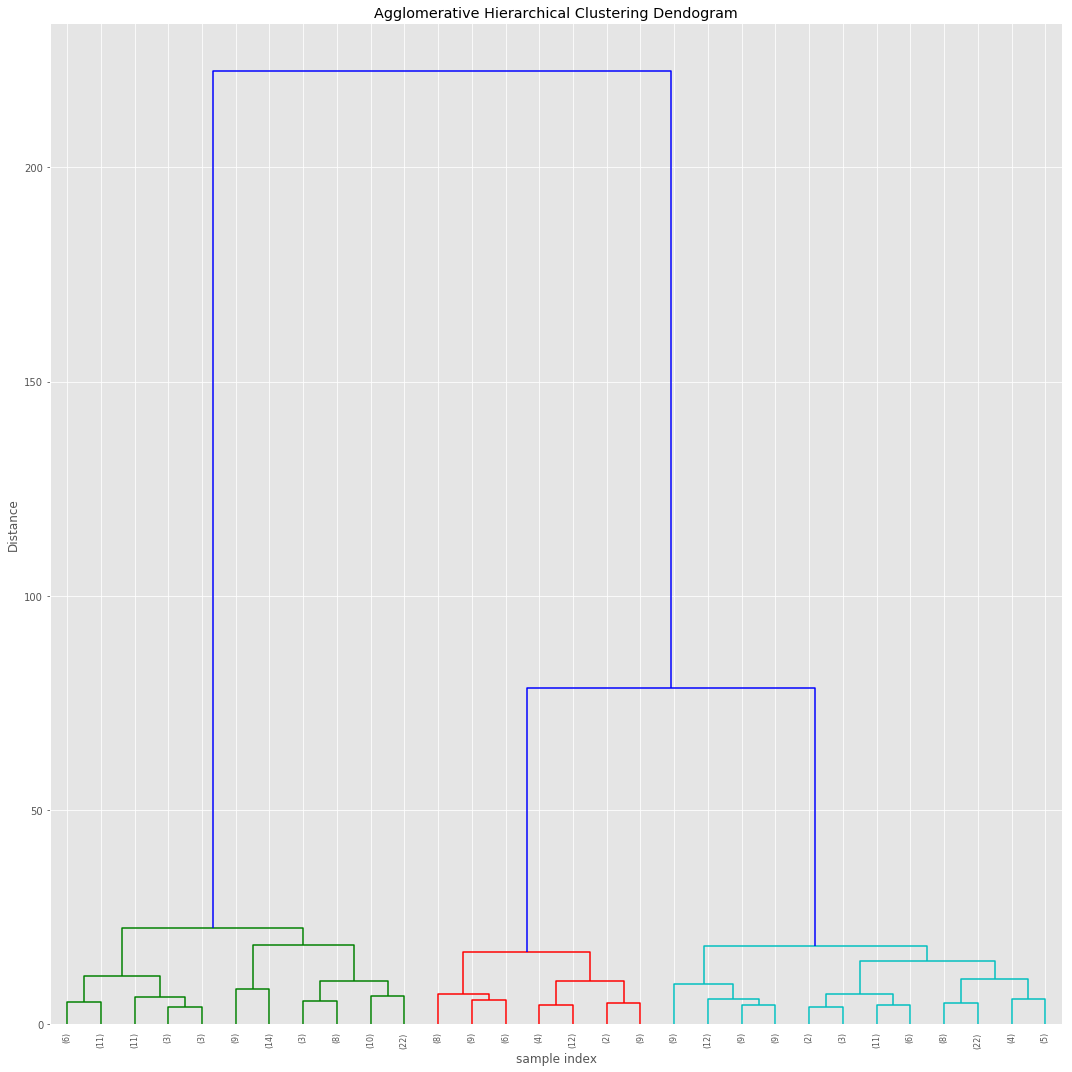

In [218]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,truncate_mode='lastp', leaf_rotation=90.,color_threshold=30,  leaf_font_size=8.)
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

From the above dendogram, we can visually see that from 25 to 80 we get 3 clusters which is largely seperated and tighiest

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [219]:
fcluster_labels = fcluster(Z, t=50, criterion='distance')
print(fcluster_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [220]:
dataset["Group"] = fcluster_labels

### Use matplotlib to visually observe the clusters in 2D space 

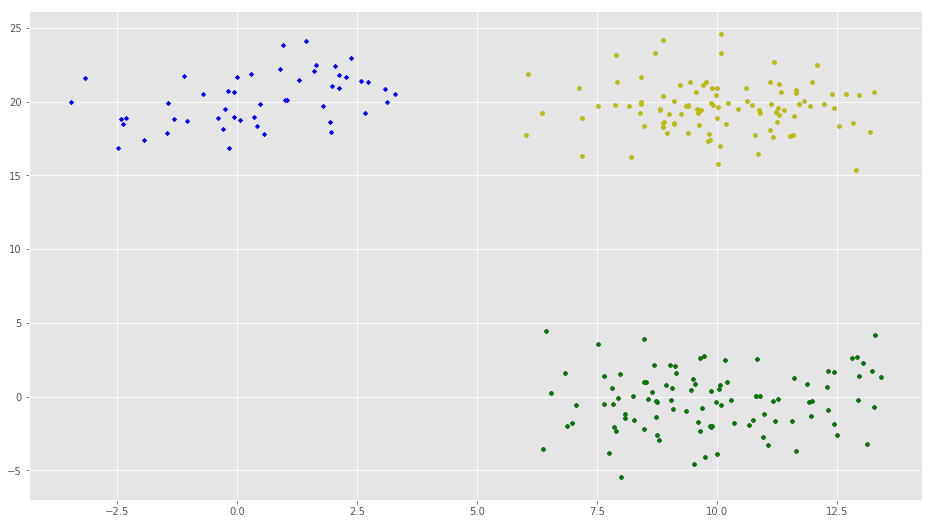

In [221]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([2,250])

for i in fcluster_labels:
        points = np.array(dataset.loc[dataset['Group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        

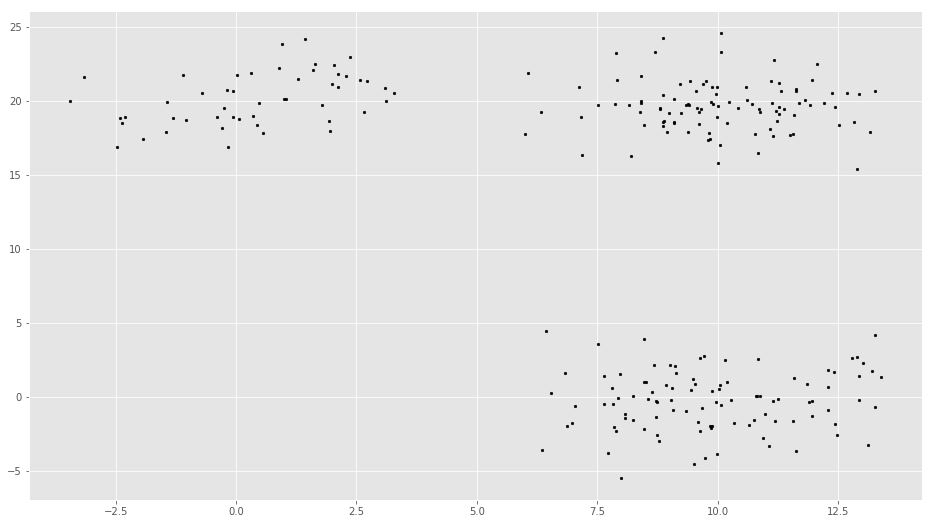

In [222]:
# Getting the values and plotting it

f1 = dataset['x'].values

f2 = dataset['y'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)